# CLEANING & DATA PROCESSING

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

#fullData = pd.read_csv('ML_Datasets/ML_file_t6_PopFirst.csv', index_col=0)
# Above Dataset has R2 - 0.5975164130362. It is t6 up to 2011, PopFirst, ffilled, with 3305 rows

#fullData = pd.read_csv('ML_Datasets/ML_file_t6_2009.csv', index_col=0)
# Above dataset has R2 - 0.5139785273526787. It is t6 up to 2009, PopFirst, ffilled, with 2951 rows

fullData = pd.read_csv('ML_Datasets/ML_file_means_t6_2009.csv', index_col=0)
# Above dataset has R2 - 0.7191811409736517. It is t6 up to 2009, PopFirst, means, with 2985 rows
#  --- Just for fun I ran this again and removed HDI Index to get more rows... 
# we got 3366 rows, R2: 0.7151425770477278
# if shuffle=False, R2 -- 0.3457216549012049
# We tried this one while removing Refugees, and % Access to Electricity, which were highly correlated with other 
# variables (% Refugees AND HDI Index) -- R2: 0.7078713181190831

#fullData = pd.read_csv('ML_Datasets/ML_file_means_t6_2011.csv', index_col=0)
# Above dataset has R2 - 0.6032748262800556. It is t6 up to 2011, PopFirst, means, with 3337 rows
# With Refugess and % Access to Electricity removed... R2: 0.5975849077502393.


# T2: Means 2009, Ffill 2009, Means 2014, Ffill 2014
# Means 2009
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t2_2009.csv", index_col=0)
# Above dataset has R2 - 0.09028853870671172. It is t2 up to 2009, PopFirst, means, with 2989 rows

# Means 2014
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t2_2014.csv", index_col=0)
# Above dataset has R2: 0.09070119854935921. It is t2 up to 2014, PopFirst, means, with 3868 rows
# if shuffle=False, R2: 0.08334096714857965

# Ffill 2009
#fullData = pd.read_csv("ML_Datasets/ML_file_ffills_t2_2009.csv", index_col=0) -- File has been overwritten
# Above dataset has R2: -0.20542020226003177. 
# Ffill 2014
#fullData = pd.read_csv("ML_Datasets/ML_file_ffills_t2_2014.csv", index_col=0)
# R2: 0.08117837653146709

# T4: Means 2009, Ffill 2009, Means 2013, Ffill 2013
# Means 2009
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t4_2009.csv", index_col=0)
# Above dataset has R2: 0.3634461415567968. It is t4 up to 2009, PopFirst, means, with 2987 rows

#Means 2013
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t4_2013.csv", index_col=0)
# Above dataset has R2: 0.33584284550624377. It is t4 up to 2013, PopFirst, means, with 3690 rows

#Ffill 2009
#fullData = pd.read_csv("ML_Datasets/ML_file_ffills_t4_2009.csv", index_col=0)
# R2: 0.26690444078770215, 2953 rows

#Ffill 2013
#fullData = pd.read_csv("ML_Datasets/ML_file_ffills_t4_2013.csv", index_col=0)
# Above dataset has R2: 0.32113996161012437. It is t4 up to 2013, PopFirst, ffills, with 3656 rows.

# Means 2009 t8
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t8_2009.csv", index_col=0)
# Above dataset has R2: 0.7444745372255863. It is t8 up to 2009, PopFirst, means, with 2984 rows.

# Means 2002 t15
#fullData = pd.read_csv("ML_Datasets/ML_file_means_t15_2002.csv", index_col=0)
# R2: 0.8336342845189663

#Ffills 2002 t15
#fullData = pd.read_csv("ML_Datasets/ML_file_ffills_t8_2009.csv", index_col=0)
# R2: 0.7334197643903755


fullData.head(100)


,Country Name,Country Code,Year,ID_col,Population,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,HDI Index,% Water Access,Refugees,% Refugees,Pop_t,Ref_t,% Refugees_t,Change % Ref
0,Aruba,ABW,1990,ABW90,62149.0,0.0,88.445351,NaN,NaN,NaN,0.089993,0.0,0.000000,83200.0,0.0,0.000000,0.000000
218,Aruba,ABW,1991,ABW91,64622.0,0.0,88.780846,NaN,NaN,NaN,0.086998,0.0,0.000000,85451.0,0.0,0.000000,0.000000
436,Aruba,ABW,1992,ABW92,68235.0,0.0,89.115829,NaN,NaN,NaN,0.084004,0.0,0.000000,87277.0,0.0,0.000000,0.000000
654,Aruba,ABW,1993,ABW93,72504.0,0.0,89.447754,NaN,NaN,NaN,0.081002,0.0,0.000000,89005.0,0.0,0.000000,0.000000
872,Aruba,ABW,1994,ABW94,76700.0,0.0,89.773560,NaN,NaN,NaN,0.077001,0.0,0.000000,90853.0,0.0,0.000000,0.000000
1090,Aruba,ABW,1995,ABW95,80324.0,0.0,90.090187,NaN,1.245086,NaN,0.074000,0.0,0.000000,92898.0,0.0,0.000000,0.000000
1308,Aruba,ABW,1996,ABW96,83200.0,0.0,90.394585,NaN,7.814432,NaN,0.070998,0.0,0.000000,94992.0,0.0,0.000000,0.000000
1526,Aruba,ABW,1997,ABW97,85451.0,0.0,90.683678,NaN,6.666622,NaN,0.068004,0.0,0.000000,97017.0,0.0,0.000000,0.000000
1744,Aruba,ABW,1998,ABW98,87277.0,0.0,90.954422,NaN,1.154469,NaN,0.064003,0.0,0.000000,98737.0,0.0,0.000000,0.000000
1962,Aruba,ABW,1999,ABW99,89005.0,0.0,91.203751,NaN,4.514062,NaN,0.060997,0.0,0.000000,100031.0,0.0,0.000000,0.000000


In [3]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 0 to 6103
Data columns (total 17 columns):
Country Name          6104 non-null object
Country Code          6104 non-null object
Year                  6104 non-null int64
ID_col                6104 non-null object
Population            6090 non-null float64
Battle Deaths         6076 non-null float64
% Access to Electr    5927 non-null float64
HR Protect Score      5263 non-null float64
Annual GDP Growth     5417 non-null float64
HDI Index             4753 non-null float64
% Water Access        5398 non-null float64
Refugees              6104 non-null float64
% Refugees            6087 non-null float64
Pop_t                 4334 non-null float64
Ref_t                 4340 non-null float64
% Refugees_t          4334 non-null float64
Change % Ref          4325 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 858.4+ KB


In [4]:
dropNA = fullData.dropna()
dropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 2835 to 4359
Data columns (total 17 columns):
Country Name          2985 non-null object
Country Code          2985 non-null object
Year                  2985 non-null int64
ID_col                2985 non-null object
Population            2985 non-null float64
Battle Deaths         2985 non-null float64
% Access to Electr    2985 non-null float64
HR Protect Score      2985 non-null float64
Annual GDP Growth     2985 non-null float64
HDI Index             2985 non-null float64
% Water Access        2985 non-null float64
Refugees              2985 non-null float64
% Refugees            2985 non-null float64
Pop_t                 2985 non-null float64
Ref_t                 2985 non-null float64
% Refugees_t          2985 non-null float64
Change % Ref          2985 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 419.8+ KB


In [5]:
# STEP ONE - Prep data; assign the data to X and y
X = dropNA[["Refugees", "% Refugees", "HDI Index", "Battle Deaths", "% Access to Electr", "HR Protect Score", "Annual GDP Growth", "% Water Access"]]
y = dropNA["Change % Ref"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2985, 8) (2985, 1)


In [6]:
# Run a correlation matrix with only those variables in the X matrix
corr2 = X.corr()
corr2.style.background_gradient().set_precision(2)

,Refugees,% Refugees,HDI Index,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,% Water Access
Refugees,1,0.68,-0.22,0.34,-0.15,-0.29,0.041,0.22
% Refugees,0.68,1,-0.24,0.17,-0.19,-0.22,-0.035,0.18
HDI Index,-0.22,-0.24,1,-0.12,0.88,0.57,-0.061,-0.85
Battle Deaths,0.34,0.17,-0.12,1,-0.081,-0.27,-0.12,0.12
% Access to Electr,-0.15,-0.19,0.88,-0.081,1,0.38,-0.048,-0.84
HR Protect Score,-0.29,-0.22,0.57,-0.27,0.38,1,-0.08,-0.46
Annual GDP Growth,0.041,-0.035,-0.061,-0.12,-0.048,-0.08,1,0.079
% Water Access,0.22,0.18,-0.85,0.12,-0.84,-0.46,0.079,1


# SCALING & NORMALIZATION

In [7]:
# STEP TWO - split your data into Training and Testing using train_test_split.
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [8]:
# STEP THREE - fit the StandardScaler model to our training data.
# Use fit/transform approach to isolate testing data from training data to avoid biasing the model to testing data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
y_train=y_train.reshape(-1,1)
y_train.shape

(2388, 1)

# MULTIVARIATE LINEAR REGRESSION - TEST & TRAIN MODEL

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# STEP FOUR - Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.6299642873270732
Testing Score: 0.7191811409736519


Text(0.5,1,'Residual Plot')

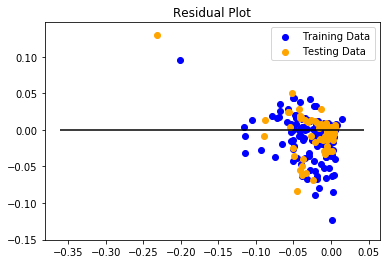

In [12]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
### END SOLUTION

In [13]:
y_predicted = model.predict(X_train_scaled)

print(y_predicted)

[[ 1.67828272e-03]
 [ 8.46069005e-04]
 [-1.76218633e-05]
 ...
 [ 1.86890800e-03]
 [-1.47570553e-02]
 [ 4.87648172e-04]]


In [14]:
# Step FIVE - Quantify model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 9.997346031562976e-05, R2: 0.7191811409736519


# MODEL PREDICTIONS

In [15]:
noProjections = fullData.drop(['Pop_t', 'Ref_t', "% Refugees_t", "Change % Ref"], axis=1)
noProjDropNA = noProjections.dropna()
noProjDropNA

,Country Name,Country Code,Year,ID_col,Population,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,HDI Index,% Water Access,Refugees,% Refugees
2835,Afghanistan,AFG,2003,AFG03,23064851.0,687.0,11.751966,-1.428170,8.444163,0.383,0.645000,2136043.0,9.261031e-02
3053,Afghanistan,AFG,2004,AFG04,24118979.0,715.0,17.236319,-1.443040,1.055556,0.398,0.627000,2414468.0,1.001066e-01
3271,Afghanistan,AFG,2005,AFG05,25070798.0,1595.0,23.000000,-1.405200,11.175270,0.408,0.609000,2166149.0,8.640128e-02
3489,Afghanistan,AFG,2006,AFG06,25893450.0,4750.0,28.228613,-1.396610,5.554138,0.417,0.592000,2107519.0,8.139197e-02
3707,Afghanistan,AFG,2007,AFG07,26616792.0,6906.0,33.748680,-1.406360,13.740205,0.429,0.574000,3057661.0,1.148771e-01
3925,Afghanistan,AFG,2008,AFG08,27294031.0,5552.0,42.400000,-1.449740,3.611368,0.437,0.556000,2833128.0,1.038003e-01
4143,Afghanistan,AFG,2009,AFG09,28004331.0,6341.0,44.854885,-1.395510,21.020649,0.453,0.538000,2887123.0,1.030956e-01
4361,Afghanistan,AFG,2010,AFG10,28803167.0,6864.0,42.700000,-1.377690,8.433290,0.463,0.520000,3054709.0,1.060546e-01
4579,Afghanistan,AFG,2011,AFG11,29708599.0,7405.0,43.222019,-1.417910,6.113685,0.471,0.502000,2664436.0,8.968568e-02
4797,Afghanistan,AFG,2012,AFG12,30696958.0,7719.0,69.100000,-1.363780,14.434741,0.482,0.484000,2586152.0,8.424783e-02


In [16]:
# Identifying check row
# myID = 'IRN11'
# ccode = 'IRN'

Year_Predict = noProjDropNA.loc[noProjDropNA['Year']== 2014 ,:]
Year_Predict


,Country Name,Country Code,Year,ID_col,Population,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,HDI Index,% Water Access,Refugees,% Refugees
5233,Afghanistan,AFG,2014,AFG14,32758020.0,12285.0,89.500000,-1.281600,2.690522,0.491,0.448000,2596270.0,0.079256
5234,Angola,AGO,2014,AGO14,26920466.0,0.0,32.000000,-0.603419,4.703971,0.564,0.514000,9484.0,0.000352
5235,Albania,ALB,2014,ALB14,2889104.0,0.0,100.000000,0.365031,1.774369,0.773,0.049000,10158.0,0.003516
5236,Andorra,AND,2014,AND14,79223.0,0.0,100.000000,3.265850,2.277683,0.853,0.000000,7.0,0.000088
5237,United Arab Emirates,ARE,2014,ARE14,9070867.0,0.0,100.000000,0.135939,4.398697,0.855,0.004000,90.0,0.000010
5238,Argentina,ARG,2014,ARG14,42981515.0,0.0,99.959244,0.355356,-2.512615,0.820,0.011000,318.0,0.000007
5239,Armenia,ARM,2014,ARM14,2906220.0,0.0,99.988976,-0.309390,3.600000,0.745,0.000000,11848.0,0.004077
5241,Antigua and Barbuda,ATG,2014,ATG14,98875.0,0.0,96.298416,1.129720,5.101940,0.770,0.020996,53.0,0.000536
5242,Australia,AUS,2014,AUS14,23504138.0,0.0,100.000000,1.651660,2.558338,0.933,0.000000,25.0,0.000001
5243,Austria,AUT,2014,AUT14,8546356.0,0.0,100.000000,1.460760,0.828734,0.901,0.000000,10.0,0.000001


In [17]:
# Getting X input variables from the year we want to predict
X = Year_Predict[["Refugees", "% Refugees", "HDI Index", "Battle Deaths", "% Access to Electr", "HR Protect Score", "Annual GDP Growth", "% Water Access"]]
X

,Refugees,% Refugees,HDI Index,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,% Water Access
5233,2596270.0,0.079256,0.491,12285.0,89.500000,-1.281600,2.690522,0.448000
5234,9484.0,0.000352,0.564,0.0,32.000000,-0.603419,4.703971,0.514000
5235,10158.0,0.003516,0.773,0.0,100.000000,0.365031,1.774369,0.049000
5236,7.0,0.000088,0.853,0.0,100.000000,3.265850,2.277683,0.000000
5237,90.0,0.000010,0.855,0.0,100.000000,0.135939,4.398697,0.004000
5238,318.0,0.000007,0.820,0.0,99.959244,0.355356,-2.512615,0.011000
5239,11848.0,0.004077,0.745,0.0,99.988976,-0.309390,3.600000,0.000000
5241,53.0,0.000536,0.770,0.0,96.298416,1.129720,5.101940,0.020996
5242,25.0,0.000001,0.933,0.0,100.000000,1.651660,2.558338,0.000000
5243,10.0,0.000001,0.901,0.0,100.000000,1.460760,0.828734,0.000000


In [18]:
# Scale X data
X_predict_scaled = X_scaler.transform(X)
X_predict_scaled

array([[13.46080026,  4.64989131, -0.84263498, ..., -1.1408496 ,
        -0.21658779,  1.53124838],
       [-0.19130284, -0.23095393, -0.40909717, ..., -0.59489857,
         0.1350384 ,  1.89321491],
       [-0.18774572, -0.03525474,  0.83212753, ...,  0.18472558,
        -0.37658366, -0.65700349],
       ...,
       [-0.23911818, -0.25226551,  0.30950661, ..., -0.77072436,
        -0.36389795, -0.53370766],
       [-0.23968817, -0.25149506, -0.31407518, ..., -0.53977303,
         0.13361609,  1.01572048],
       [-0.12265141, -0.16246967, -0.64071326, ..., -0.72409745,
        -0.31498591,  0.33017805]])

In [19]:
# Run the prediction model to predict change in percentage of Refugees from 2011 to 2017
predictions = model.predict(X_predict_scaled)
predictions

array([[-1.79746342e-02],
       [ 1.36578717e-03],
       [-1.53832401e-03],
       [-9.74205115e-04],
       [ 3.06011660e-04],
       [ 1.41799199e-03],
       [-1.83190540e-03],
       [-4.55588124e-04],
       [-3.65045736e-04],
       [ 9.73135869e-05],
       [ 7.22938979e-04],
       [-2.52923167e-03],
       [-8.92177826e-05],
       [ 7.54743748e-04],
       [ 1.46753843e-03],
       [ 1.41094494e-03],
       [ 5.76107760e-04],
       [ 5.91000329e-04],
       [ 6.49222132e-04],
       [-3.29645990e-03],
       [ 8.54481294e-04],
       [ 5.41425069e-04],
       [ 4.99084333e-04],
       [ 1.84024528e-03],
       [ 4.74076399e-04],
       [-2.09481235e-02],
       [ 1.39200223e-04],
       [-5.76582119e-02],
       [-3.94352371e-04],
       [-3.25984615e-04],
       [ 6.39745591e-04],
       [ 3.19922978e-03],
       [-2.75115363e-04],
       [ 1.42469499e-03],
       [ 3.25875346e-03],
       [-1.16889314e-03],
       [ 1.63117664e-04],
       [ 6.19824212e-04],
       [ 1.1

In [20]:
Year_Predict['Change_2020'] = predictions
Year_Predict

,Country Name,Country Code,Year,ID_col,Population,Battle Deaths,% Access to Electr,HR Protect Score,Annual GDP Growth,HDI Index,% Water Access,Refugees,% Refugees,Change_2020
5233,Afghanistan,AFG,2014,AFG14,32758020.0,12285.0,89.500000,-1.281600,2.690522,0.491,0.448000,2596270.0,0.079256,-0.017975
5234,Angola,AGO,2014,AGO14,26920466.0,0.0,32.000000,-0.603419,4.703971,0.564,0.514000,9484.0,0.000352,0.001366
5235,Albania,ALB,2014,ALB14,2889104.0,0.0,100.000000,0.365031,1.774369,0.773,0.049000,10158.0,0.003516,-0.001538
5236,Andorra,AND,2014,AND14,79223.0,0.0,100.000000,3.265850,2.277683,0.853,0.000000,7.0,0.000088,-0.000974
5237,United Arab Emirates,ARE,2014,ARE14,9070867.0,0.0,100.000000,0.135939,4.398697,0.855,0.004000,90.0,0.000010,0.000306
5238,Argentina,ARG,2014,ARG14,42981515.0,0.0,99.959244,0.355356,-2.512615,0.820,0.011000,318.0,0.000007,0.001418
5239,Armenia,ARM,2014,ARM14,2906220.0,0.0,99.988976,-0.309390,3.600000,0.745,0.000000,11848.0,0.004077,-0.001832
5241,Antigua and Barbuda,ATG,2014,ATG14,98875.0,0.0,96.298416,1.129720,5.101940,0.770,0.020996,53.0,0.000536,-0.000456
5242,Australia,AUS,2014,AUS14,23504138.0,0.0,100.000000,1.651660,2.558338,0.933,0.000000,25.0,0.000001,-0.000365
5243,Austria,AUT,2014,AUT14,8546356.0,0.0,100.000000,1.460760,0.828734,0.901,0.000000,10.0,0.000001,0.000097


In [21]:
Year_Predict.to_csv('Predictions/Refugee_Predictions_2020.csv')